## Importing the Libraries

In [420]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [421]:
df = pd.read_csv(r'C:\Users\mayar\Desktop\Amit\Datasets\players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


there are many missing values in the columns Marking & Loaned from

In [423]:
df.shape

(18278, 104)

we have 18278 players and 104 features

In [424]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [425]:
df['real_face'].value_counts()

No     16310
Yes     1968
Name: real_face, dtype: int64

## Data Cleaning

we will drop unimportant features to us 

In [426]:
df.drop(["sofifa_id", "player_url", "dob", "long_name", 'real_face'], axis = 1, inplace=True)

Finding ratio of missing values in our dataset

In [427]:
nulldata = df.isna().sum().sort_values(ascending = False)
nulldata = nulldata.reset_index(drop = False)
nulldata = nulldata.rename(columns={"index":"Columns", 0:"Value"})
nulldata['Ratio'] = (nulldata['Value']/len(df))*100
nulldata.head()

,Columns,Value,Ratio
0,loaned_from,17230,94.266331
1,nation_jersey_number,17152,93.839589
2,nation_position,17152,93.839589
3,player_tags,16779,91.798884
4,gk_speed,16242,88.860926


dropping columns with high ratio of missing values

In [428]:
df.drop(["loaned_from", "nation_jersey_number", "nation_position"], axis = 1, inplace=True)

In [429]:
df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100) **2
#making a new column for BMI that's calculated from 2 cols

In [430]:
df['ls'].values

array(['89+2', '91+3', '84+3', ..., '43+2', '43+2', '42+2'], dtype=object)

In [431]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [432]:
for col in columns:
    df[col] = df[col].str.split('+', n=1, expand=True)[0]

df[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,...,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,...,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,...,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,...,48,48,48,48,48,48,49,49,49,48


In [433]:
#fillin null values in these columns together with zero
df[columns] = df[columns].fillna(0)

In [434]:
df[columns].dtypes

ls     object
st     object
rs     object
lw     object
lf     object
cf     object
rf     object
rw     object
lam    object
cam    object
ram    object
lm     object
lcm    object
cm     object
rcm    object
rm     object
lwb    object
ldm    object
cdm    object
rdm    object
rwb    object
lb     object
lcb    object
cb     object
rcb    object
rb     object
dtype: object

In [435]:
df[columns] = df[columns].astype(int)

In [436]:
columns = ['dribbling','defending','physic','passing','shooting','pace']

In [437]:
df[columns].isnull().sum().sort_values(ascending=False)

dribbling    2036
defending    2036
physic       2036
passing      2036
shooting     2036
pace         2036
dtype: int64

In [438]:
#filling null values in these columns with median
for col in columns:
    df[col] = df[col].fillna(df[col].median())

df[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,64.0,56.0,66.0,58.0,54.0,69.0
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [439]:
df[columns] = df[columns].astype(int)

In [440]:
#see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

In [441]:
#we will fill the rest of missing values with 0
df = df.fillna(0)

In [442]:
df.isnull().sum().sort_values(ascending=False)
#no missing values

short_name              0
movement_reactions      0
st                      0
ls                      0
goalkeeping_reflexes    0
                       ..
gk_handling             0
gk_diving               0
physic                  0
defending               0
BMI                     0
Length: 97, dtype: int64

In [443]:
df['contract_valid_until'].values

array([2021., 2022., 2022., ..., 2019., 2022., 2019.])

we can observe that end of contract year is of of datatype float, we'll convert it to int to save some memory

In [444]:
df['contract_valid_until']=df['contract_valid_until'].astype(int)

In [445]:
df['team_jersey_number'].dtype

dtype('float64')

In [446]:
#we can observe that team jersey number is of of datatype float, we'll convert it to int to save some memory
df['team_jersey_number']=df['team_jersey_number'].astype(int)

In [447]:
gkcolumns = ['gk_diving','gk_handling','gk_kicking','gk_reflexes' ,'gk_speed', 'gk_positioning']        

In [448]:
df[gkcolumns]=df[gkcolumns].astype(int)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

## EDA

Clubs with highest overall rating

In [450]:
df_club = df.groupby(['club']).mean()
df_club = df_club.sort_values('overall', ascending=False).reset_index()
df_club.head()

,club,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,FC Bayern München,25.130435,183.826087,78.956522,81.304348,85.826087,2.994674e+07,109391.304348,2.608696,3.521739,...,61.434783,61.434783,61.434783,61.695652,60.652174,58.695652,58.695652,58.695652,60.652174,23.320380
1,Real Madrid,24.909091,180.212121,75.848485,80.121212,85.727273,2.720758e+07,162242.424242,2.272727,3.393939,...,61.757576,61.757576,61.757576,62.515152,61.030303,58.060606,58.060606,58.060606,61.030303,23.317000
2,Juventus,27.000000,184.787879,79.636364,80.060606,83.242424,2.228712e+07,113636.363636,2.363636,3.303030,...,60.424242,60.424242,60.424242,60.454545,59.424242,58.181818,58.181818,58.181818,59.424242,23.295980
3,Uruguay,31.000000,180.347826,76.391304,78.608696,78.608696,0.000000e+00,0.000000,1.000000,3.217391,...,58.434783,58.434783,58.434783,58.739130,58.043478,56.217391,56.217391,56.217391,58.043478,23.442350
4,FC Barcelona,24.060606,180.515152,74.090909,78.363636,85.727273,2.634242e+07,150000.000000,2.212121,3.151515,...,63.090909,63.090909,63.090909,62.818182,61.939394,60.363636,60.363636,60.363636,61.939394,22.709112


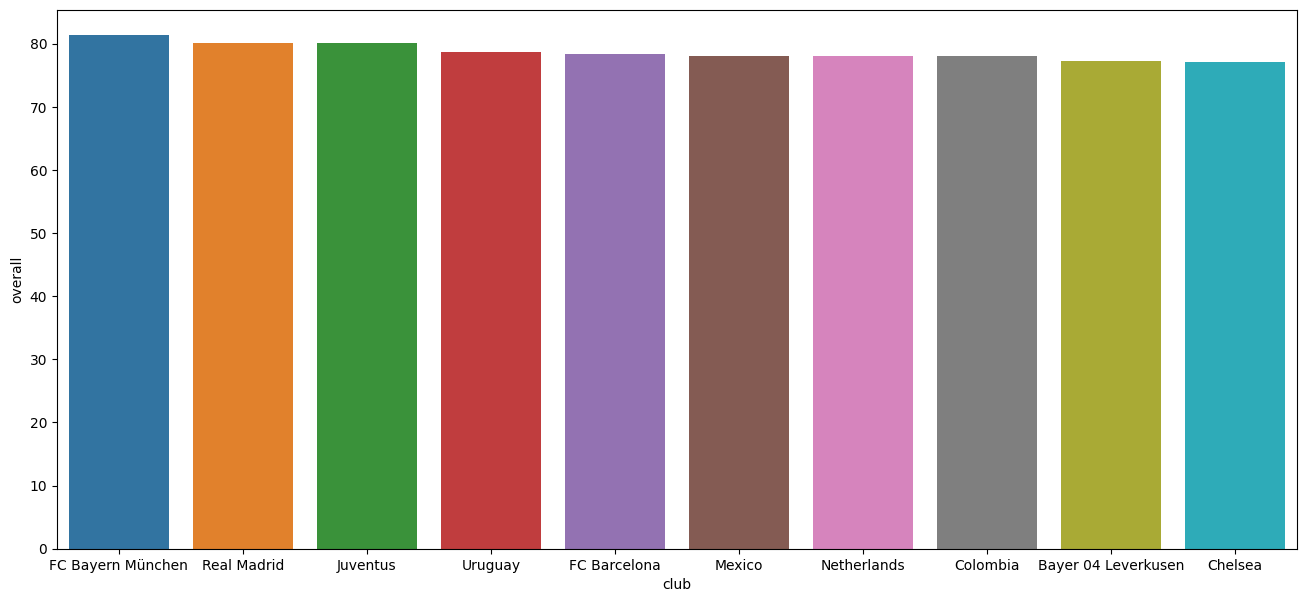

In [451]:
plt.figure(figsize=(16,7))
sns.barplot(data = df_club.iloc[:10], x = 'club', y='overall')
plt.show()

we can see that bayern munchen has the highest overall rating of players followed by real madrid then juve

### Age

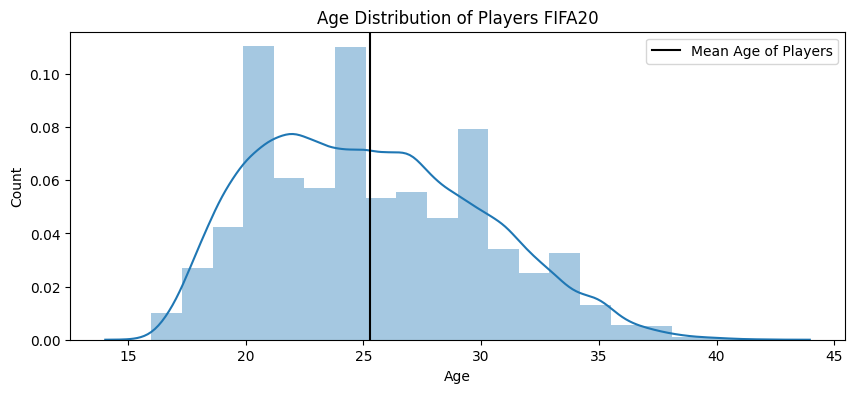

In [452]:
plt.figure(figsize=(10,4))
sns.distplot(a=df['age'],kde=True,bins=20)
plt.axvline(x=np.mean(df['age']),c='black',label='Mean Age of Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Players FIFA20')
plt.show()

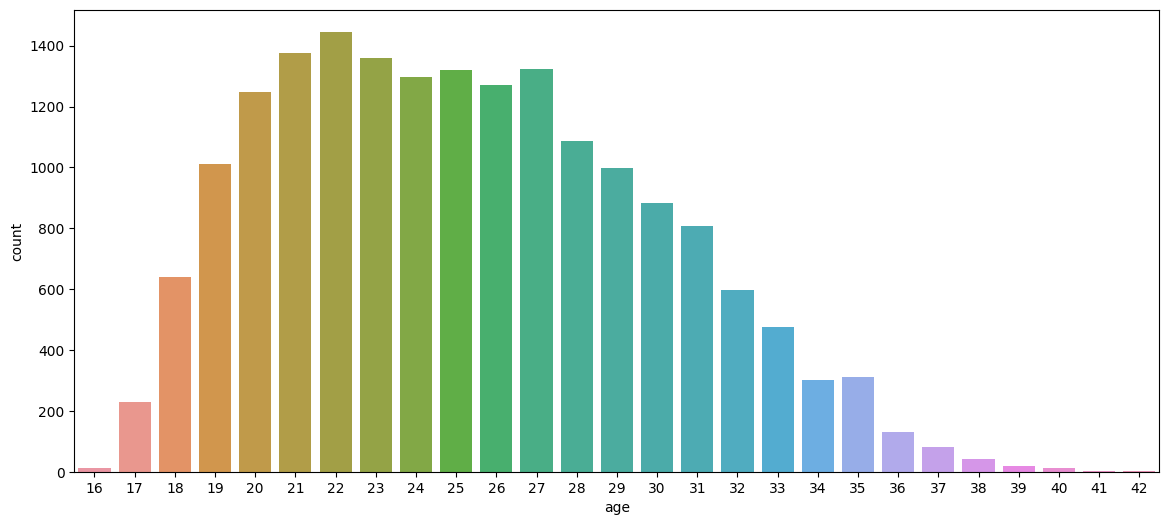

In [453]:
plt.figure(figsize=(14,6))
sns.countplot(data = df, x=df['age'])
plt.show()

most players are between 20 and 30 years

In [454]:
print("The age of youngest player is", df['age'].min())
print("The age of oldest player is", df['age'].max())

The age of youngest player is 16
The age of oldest player is 42


In [455]:
df.loc[df['age']==df['age'].min()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
4764,A. Hložek,16,185,80,Czech Republic,Sparta Praha,70,86,3500000,1000,...,50,50,50,52,49,46,46,46,49,23.374726
6630,Fábio Silva,16,185,75,Portugal,FC Porto,68,85,1800000,1000,...,40,40,40,43,41,38,38,38,41,21.913806
12158,E. Millot,16,175,65,France,AS Monaco,63,86,800000,1000,...,56,56,56,58,56,51,51,51,56,21.224490
12160,S. Esposito,16,186,75,Italy,Inter,63,85,825000,2000,...,40,40,40,41,39,37,37,37,39,21.678807
14626,A. Velasco,16,167,63,Argentina,Independiente,60,83,450000,1000,...,54,54,54,55,55,50,50,50,55,22.589551
17614,D. Obbekjær,16,193,86,Denmark,Odense Boldklub,53,71,110000,1000,...,48,48,48,44,46,51,51,51,46,23.087868
17782,S. Anderson,16,175,64,United States,Colorado Rapids,52,75,100000,1000,...,48,48,48,50,50,48,48,48,50,20.897959
17827,D. Burns,16,176,62,Northern Ireland,St. Patrick's Athletic,52,69,100000,1000,...,39,39,39,43,42,36,36,36,42,20.015496
18031,O. Stefánsson,16,190,75,Iceland,IFK Norrköping,51,64,60000,1000,...,45,45,45,43,46,50,50,50,46,20.775623
18171,J. Starbuck,16,174,69,England,Grimsby Town,49,72,60000,1000,...,43,43,43,44,43,40,40,40,43,22.790329


there are 12 players of age 16, most of them have a great potential

In [456]:
df.loc[df['age']==df['age'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
11832,C. Muñoz,42,177,73,Argentina,CD Universidad de Concepción,64,64,50000,1000,...,0,0,0,0,0,0,0,0,0,23.301095
13003,H. Sulaimani,42,173,70,Saudi Arabia,Al Ahli,63,63,0,5000,...,66,66,66,62,62,66,66,66,62,23.388687


there are 2 players of age 42, with a potential equal to their current overall rating

### Age vs Overall rating

Player with highest overall rating and his age

In [457]:
df.loc[df['overall']==df['overall'].max()][['short_name', 'age']]

,short_name,age
0,L. Messi,32


Youngest Players and their ratings

In [458]:
df.loc[df['age']==df['age'].min()][['short_name', 'overall']]

,short_name,overall
4764,A. Hložek,70
6630,Fábio Silva,68
12158,E. Millot,63
12160,S. Esposito,63
14626,A. Velasco,60
17614,D. Obbekjær,53
17782,S. Anderson,52
17827,D. Burns,52
18031,O. Stefánsson,51
18171,J. Starbuck,49


### Age vs Value in Euro

Player with highest value in euro and his age

In [459]:
df.loc[df['value_eur'] == df['value_eur'].max()][['short_name', 'age', 'value_eur']]

,short_name,age,value_eur
2,Neymar Jr,27,105500000


### Height

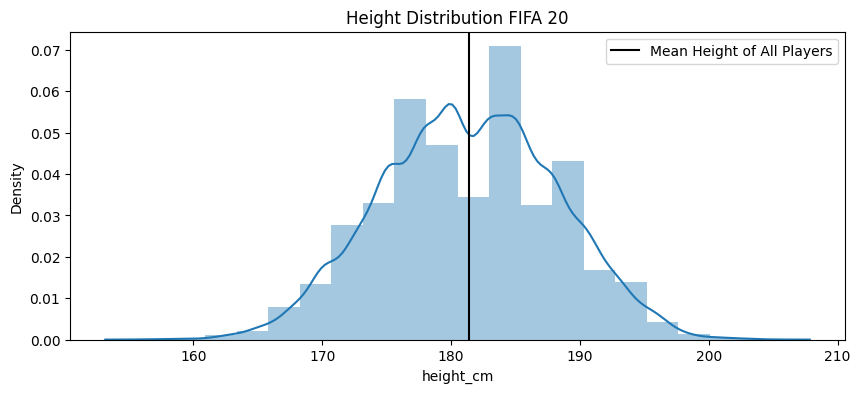

In [460]:
plt.figure(figsize=(10,4))
plt.title('Height Distribution FIFA 20')
sns.distplot(a=df['height_cm'], kde=True, bins=20)
plt.axvline(x=np.mean(df['height_cm']),c='black',label='Mean Height of All Players')
plt.legend()

height mostly ranges between about 175 cm and 190 cm

Tallest player info

In [461]:
df.loc[df['height_cm'] == df['height_cm'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
9208,T. Holý,27,205,102,Czech Republic,Ipswich Town,66,70,575000,3000,...,0,0,0,0,0,0,0,0,0,24.271267


Shortest player info

In [462]:
df.loc[df['height_cm'] == df['height_cm'].min()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
4829,N. Barrios,21,156,58,Argentina,San Lorenzo de Almagro,70,80,2900000,8000,...,52,52,52,56,54,44,44,44,54,23.833005


### Height vs Pace

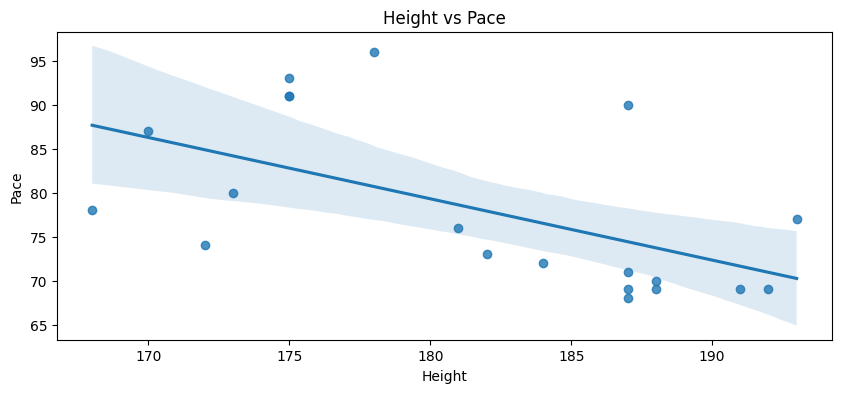

In [463]:
plt.figure(figsize=(10,4))
sns.regplot(x=df.head(20)['height_cm'],y=df.head(20)['pace'])
plt.title('Height vs Pace')
plt.xlabel('Height')
plt.ylabel('Pace')
plt.show()

we can observe that as height increases, pace decreases

### Weight

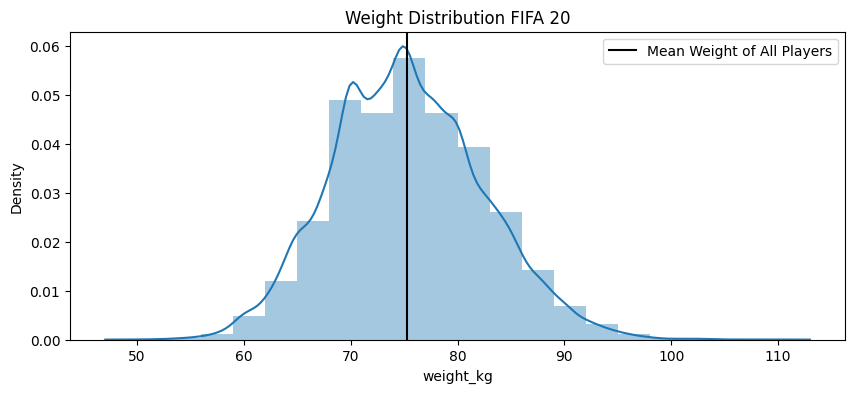

In [464]:
plt.figure(figsize=(10,4))
plt.title('Weight Distribution FIFA 20')
sns.distplot(a=df['weight_kg'], kde=True, bins=20)
plt.axvline(x=np.mean(df['weight_kg']),c='black',label='Mean Weight of All Players')
plt.legend()

most players' weight ranges between 70 and 85 kg

player with min weight info

In [465]:
df.loc[df['weight_kg'] == df['weight_kg'].min()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
13070,B. Al Mutairi,29,168,50,Saudi Arabia,Al Fayha,63,63,300000,4000,...,56,56,56,62,61,56,56,56,61,17.71542


player with max weight info

In [466]:
df.loc[df['weight_kg'] == df['weight_kg'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
10693,A. Akinfenwa,37,178,110,England,Wycombe Wanderers,65,65,190000,2000,...,49,49,49,44,43,48,48,48,43,34.717839


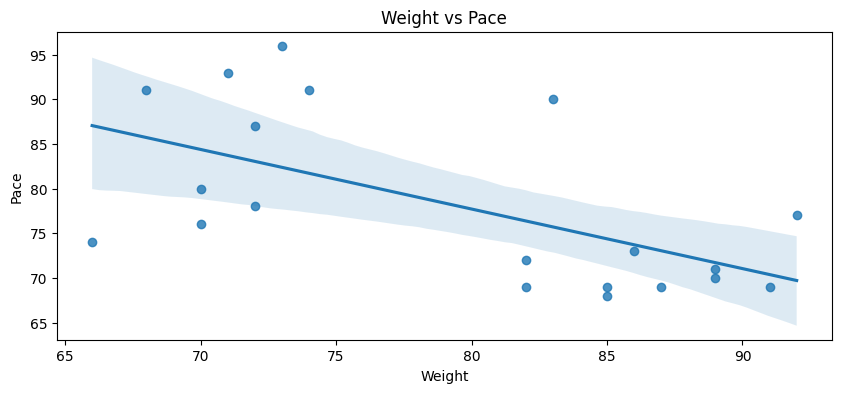

In [467]:
plt.figure(figsize=(10,4))
sns.regplot(x=df.head(20)['weight_kg'],y=df.head(20)['pace'])
plt.title('Weight vs Pace')
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

as weight increases pace decreases

### Height vs Weight

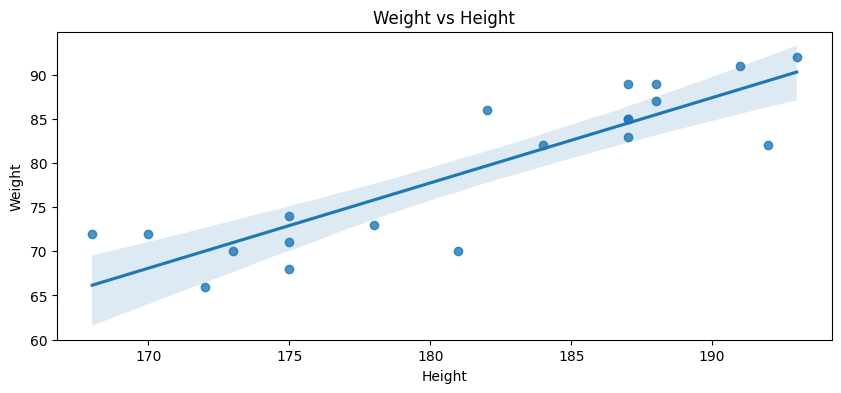

In [468]:
plt.figure(figsize=(10,4))
sns.regplot(x=df.head(20)['height_cm'],y=df.head(20)['weight_kg'])
plt.title('Weight vs Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

weight and height are linearly dependent

### BMI

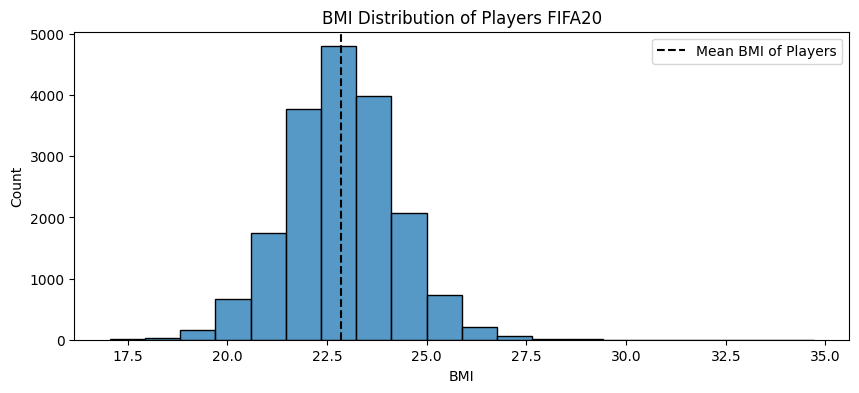

In [469]:
plt.figure(figsize=(10,4))
sns.histplot(x=df['BMI'], kde=False, bins=20)
plt.axvline(x=np.mean(df['BMI']),c='black',ls='--',label='Mean BMI of Players')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution of Players FIFA20')
plt.show()

Relation between BMI and pace

<AxesSubplot: xlabel='BMI', ylabel='pace'>

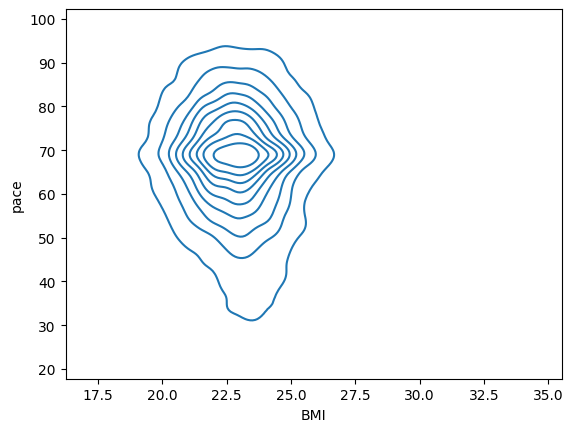

In [470]:
sns.kdeplot(x=df['BMI'], y=df['pace'])

### Nationality

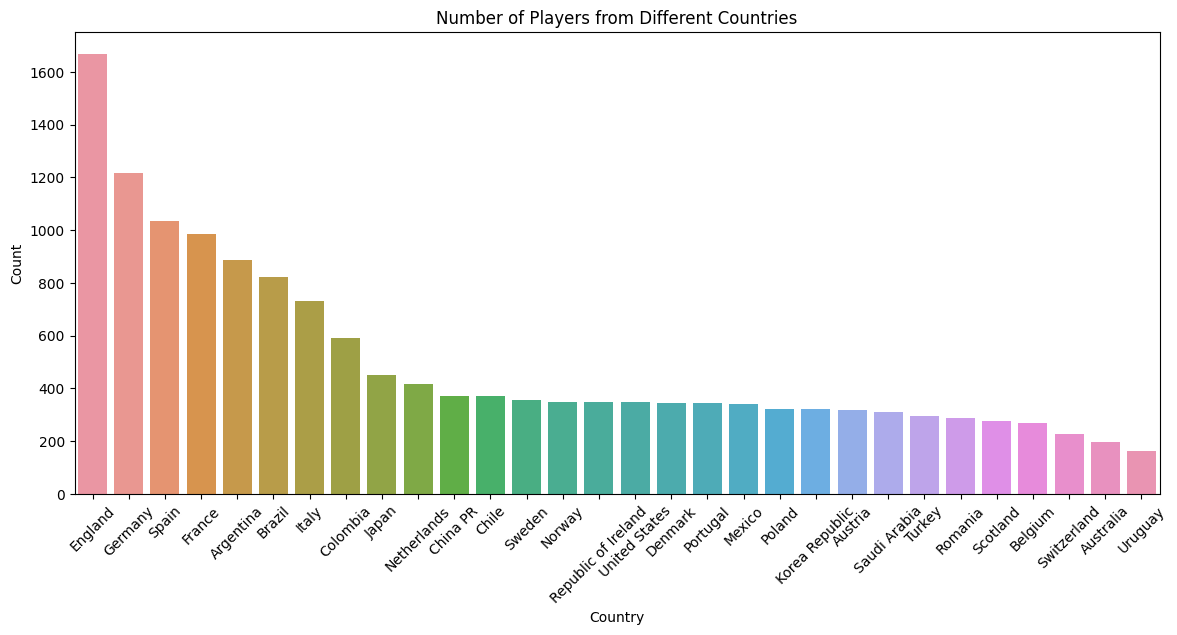

In [471]:
plt.figure(figsize=(14,6))
sns.countplot(data = df, x=df['nationality'],order=df['nationality'].value_counts().head(30).index)
plt.title('Number of Players from Different Countries')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

England, Germany, Spain and France are countries with maximum number of players

### Nationality vs Average Overall Rate

In [472]:
def avg_rate(country):
    return np.mean(df.loc[df['nationality']==country]['overall'])

top_countries = df['nationality'].value_counts().head(20).index
avg_rates = []
for i in top_countries:
    avg_rates.append(round(avg_rate(i),2))

print(avg_rates)

[63.25, 65.94, 69.95, 67.42, 69.12, 71.16, 67.66, 65.68, 63.69, 68.15, 59.49, 64.81, 63.79, 63.03, 61.01, 64.53, 63.68, 70.51, 65.81, 63.49]


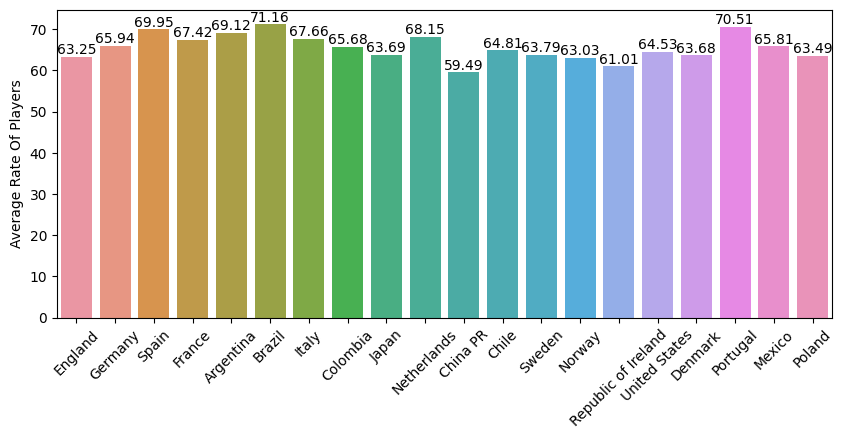

In [473]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=top_countries, y=avg_rates, order=top_countries)
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Average Rate Of Players')
plt.xticks(rotation=45)
plt.show()

Brazil has top average rates of players, followed by Portugal, then Spain

In [474]:
df.loc[df['overall']==df['overall'].max()] 
#player of max rating is from Argentina which explains why it has a high avg rate of players

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66,66,66,68,63,52,52,52,63,24.913495


In [475]:
df.loc[df['nationality']=='Brazil'].sort_values(by=['overall'],ascending=False).head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,61,61,61,66,61,46,46,46,61,22.204082
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,...,0,0,0,0,0,0,0,0,0,24.944492
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,...,0,0,0,0,0,0,0,0,0,24.332277
42,Casemiro,27,185,84,Brazil,Real Madrid,87,89,53500000,240000,...,84,84,84,78,79,84,84,84,79,24.543462
44,Fernandinho,34,179,67,Brazil,Manchester City,87,87,19500000,200000,...,84,84,84,80,80,82,82,82,80,20.910708
45,Thiago Silva,34,183,82,Brazil,Paris Saint-Germain,87,87,18500000,135000,...,82,82,82,77,78,84,84,84,78,24.485652
56,Marquinhos,25,183,75,Brazil,Paris Saint-Germain,86,90,51500000,120000,...,82,82,82,79,81,83,83,83,81,22.395413
63,Roberto Firmino,27,181,76,Brazil,Liverpool,86,87,52000000,170000,...,73,73,73,72,69,67,67,67,69,23.198315
68,Coutinho,27,172,68,Brazil,FC Bayern München,86,86,46500000,175000,...,68,68,68,70,66,58,58,58,66,22.985398
101,Marcelo,31,174,75,Brazil,Real Madrid,85,85,28000000,205000,...,81,81,81,82,81,79,79,79,81,24.772097


Brazil has alot of high-rated players!

In [476]:
df.loc[df['nationality']=='Portugal'].sort_values(by=['overall'],ascending=False).head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61,61,61,65,61,53,53,53,61,23.735308
41,Bernardo Silva,24,173,64,Portugal,Manchester City,87,90,64000000,210000,...,69,69,69,72,67,57,57,57,67,21.383942
85,Bruno Fernandes,24,179,69,Portugal,Sporting CP,85,88,49000000,24000,...,77,77,77,77,74,68,68,68,74,21.534908
86,A. Lopes,28,184,81,Portugal,Olympique Lyonnais,85,87,33500000,88000,...,0,0,0,0,0,0,0,0,0,23.924858
112,João Cancelo,25,182,74,Portugal,Manchester City,84,89,36500000,150000,...,79,79,79,83,82,76,76,76,82,22.340297
128,Pepe,36,188,81,Portugal,FC Porto,84,84,6500000,16000,...,76,76,76,73,75,82,82,82,75,22.917610
129,João Moutinho,32,170,61,Portugal,Wolverhampton Wanderers,84,84,23500000,125000,...,77,77,77,74,72,70,70,70,72,21.107266
151,Pizzi,29,177,72,Portugal,SL Benfica,84,84,30500000,26000,...,75,75,75,75,71,65,65,65,71,22.981902
168,Gonçalo Guedes,22,179,68,Portugal,Valencia CF,83,88,34500000,46000,...,60,60,60,63,59,51,51,51,59,21.222808
189,William Carvalho,27,187,83,Portugal,Real Betis,83,85,27500000,35000,...,80,80,80,73,73,78,78,78,73,23.735308


In [477]:
df.loc[df['nationality']=='Spain'].sort_values(by=['overall'],ascending=False).head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,...,0,0,0,0,0,0,0,0,0,22.243924
21,Sergio Busquets,30,189,76,Spain,FC Barcelona,89,89,55000000,300000,...,86,86,86,78,78,82,82,82,78,21.276000
18,Sergio Ramos,33,184,82,Spain,Real Madrid,89,89,31500000,300000,...,84,84,84,80,82,87,87,87,82,24.220227
29,Piqué,32,194,85,Spain,FC Barcelona,88,88,38000000,285000,...,83,83,83,77,78,85,85,85,78,22.584759
33,David Silva,33,173,67,Spain,Manchester City,88,88,36000000,265000,...,69,69,69,68,63,56,56,56,63,22.386314
51,Jordi Alba,30,170,68,Spain,FC Barcelona,87,87,40000000,240000,...,81,81,81,84,84,78,78,78,84,23.529412
52,Thiago,28,174,70,Spain,FC Bayern München,87,87,50000000,180000,...,78,78,78,78,75,69,69,69,75,23.120624
62,Isco,27,176,79,Spain,Real Madrid,86,87,51000000,245000,...,70,70,70,70,67,62,62,62,67,25.503616
69,Parejo,30,182,74,Spain,Valencia CF,86,86,41000000,69000,...,78,78,78,74,71,69,69,69,71,22.340297
94,Carvajal,27,173,73,Spain,Real Madrid,85,86,38000000,205000,...,82,82,82,83,83,80,80,80,83,24.391059


In [478]:
df.loc[df['nationality']=='France'].sort_values(by=['overall'],ascending=False).head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,...,62,62,62,66,63,54,54,54,63,23.040020
22,A. Griezmann,28,176,73,France,FC Barcelona,89,89,69000000,370000,...,71,71,71,73,70,65,65,65,70,23.566632
15,N. Kanté,28,168,72,France,Chelsea,89,90,66000000,235000,...,87,87,87,85,84,83,83,83,84,25.510204
24,P. Pogba,26,191,84,France,Manchester United,88,91,72500000,250000,...,77,77,77,76,74,72,72,72,74,23.025685
32,H. Lloris,32,188,82,France,Tottenham Hotspur,88,88,36000000,150000,...,0,0,0,0,0,0,0,0,0,23.200543
40,A. Laporte,25,189,85,France,Manchester City,87,90,56500000,195000,...,82,82,82,78,80,85,85,85,80,23.795526
46,K. Benzema,31,185,81,France,Real Madrid,87,87,45000000,285000,...,62,62,62,62,58,54,54,54,58,23.666910
59,S. Umtiti,25,182,75,France,FC Barcelona,86,89,50000000,210000,...,80,80,80,77,79,84,84,84,79,22.642193
72,A. Lacazette,28,175,73,France,Arsenal,86,86,46000000,165000,...,62,62,62,63,59,55,55,55,59,23.836735
99,B. Matuidi,32,180,75,France,Juventus,85,85,25000000,145000,...,82,82,82,82,82,81,81,81,82,23.148148


we can see that the top players are mostly from these 4 countries

In [485]:
top_players=df.sort_values(by=['overall'], ascending=False).head(15)
top_players

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66,66,66,68,63,52,52,52,63,24.913495
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61,61,61,65,61,53,53,53,61,23.735308
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,61,61,61,66,61,46,46,46,61,22.204082
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,0,0,0,0,0,0,0,0,0,24.615211
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,63,63,63,66,61,49,49,49,61,24.163265
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,77,77,77,77,73,66,66,66,73,21.366869
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,...,0,0,0,0,0,0,0,0,0,24.307244
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,...,83,83,83,79,81,87,87,87,81,24.698650
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,...,81,81,81,81,79,72,72,72,79,22.309356
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,...,67,67,67,70,66,57,57,57,66,23.183673


### Club

<AxesSubplot: xlabel='club'>

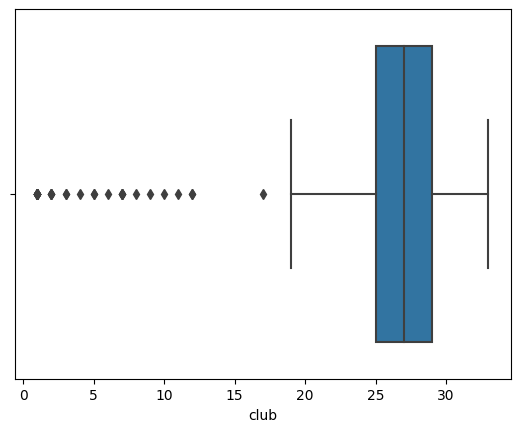

In [494]:
sns.boxplot(x=df['club'].value_counts())

there are many outliers

In [495]:
df['club'].value_counts().median()

27.0

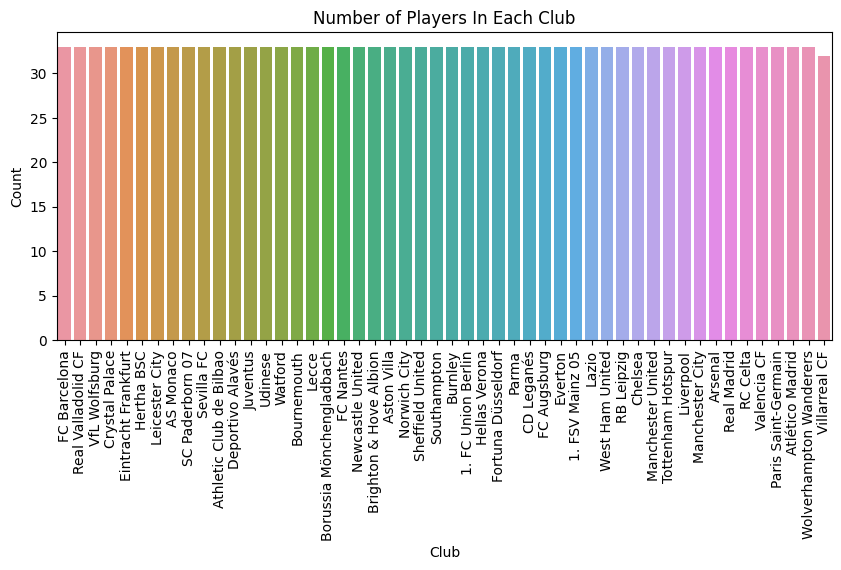

In [507]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, x=df['club'],order=df['club'].value_counts()[:50].index)
plt.title('Number of Players In Each Club')
plt.xlabel('Club')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

we can see that most teams have 33 players

### Club vs Overall Rating

In [511]:
def avg_rate(club):
    return np.mean(df.loc[df['club']==club]['overall'])

top_clubs = df['club'].value_counts().head(50).index
avg_rates = []
for i in top_clubs:
    avg_rates.append(round(avg_rate(i),2))

print(avg_rates)

[78.36, 71.94, 73.15, 70.79, 73.55, 71.76, 74.36, 73.27, 66.58, 75.42, 73.73, 72.03, 80.06, 71.85, 75.0, 72.3, 66.27, 72.97, 69.52, 73.33, 72.39, 69.18, 69.33, 68.88, 72.24, 71.3, 68.79, 69.79, 69.76, 69.73, 70.73, 70.33, 75.12, 69.97, 75.94, 72.58, 73.88, 77.06, 76.85, 76.48, 75.85, 77.0, 75.06, 80.12, 71.7, 75.39, 75.91, 76.18, 70.45, 73.06]


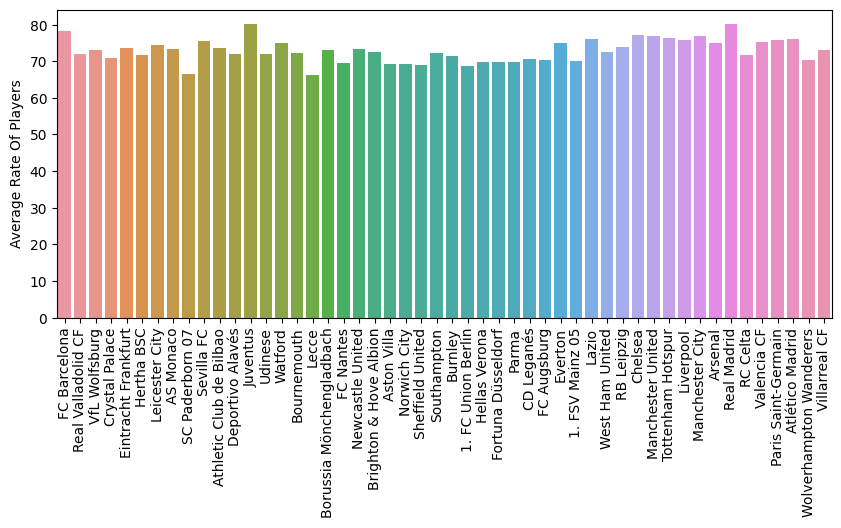

In [513]:
plt.figure(figsize=(10,4))
sns.barplot(x=top_clubs, y=avg_rates)
# for container in ax.containers:
#     ax.bar_label(container)
plt.ylabel('Average Rate Of Players')
plt.xticks(rotation=90)
plt.show()

we can see that RealMadrid, Juventus, and Barcelona have the top rated players

### Overall Rating

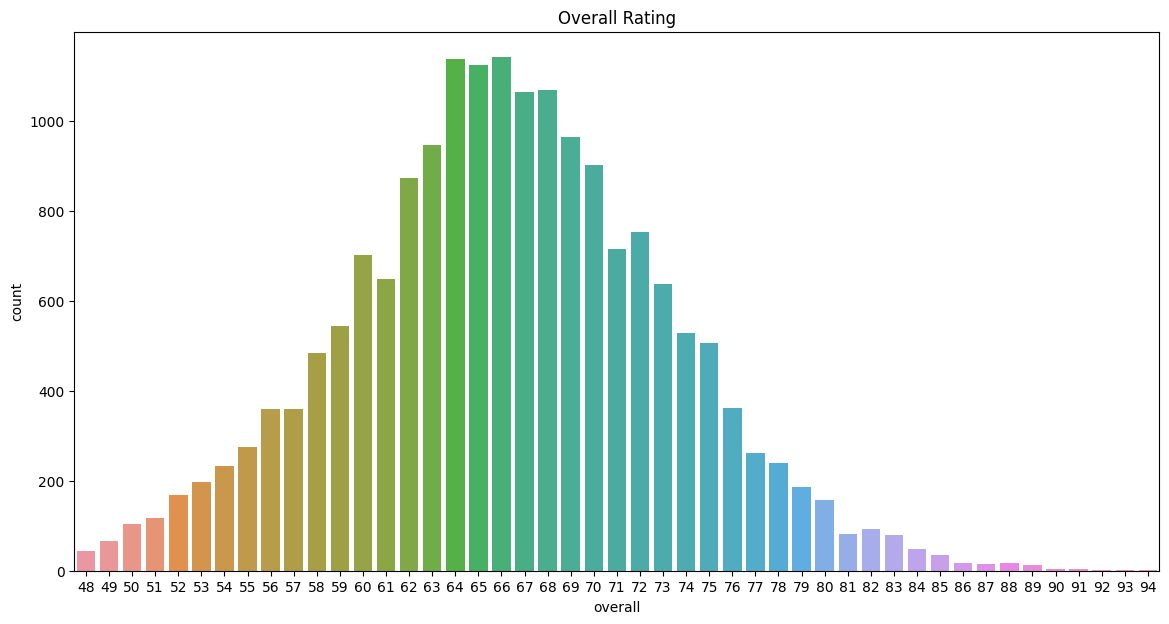

In [520]:
plt.figure(figsize=(14, 7))
sns.countplot(data = df,x=df['overall'])
plt.title("Overall Rating")
plt.show()

most players are rated between 62 and 72, 
min rating is 48, 
max rating is 94

heighest-rated player is:

In [517]:
highest_rate=df.loc[df['overall']==df['overall'].max()]['overall'][0]
top_player = df.loc[df['overall']==df['overall'].max()]['short_name'][0]
print("The Highest-rated player is {} and his rating is {}".format(top_player,highest_rate))

The Heighest-rated player is L. Messi and his rating is 94


Lowest-rated players

In [518]:
df.loc[df['overall'] == df['overall'].min()][['short_name', 'overall', 'nationality']]

,short_name,overall,nationality
18235,Tao Qianglong,48,China PR
18236,B. McPherson,48,England
18237,J. Hope,48,England
18238,L. Singh,48,Canada
18239,V. Storsve,48,Norway
18240,C. Painter,48,England
18241,M. Peck,48,England
18242,R. Wikberg,48,Sweden
18243,E. Sartorius,48,England
18244,K. Barker,48,England


### Overall Rating vs Value

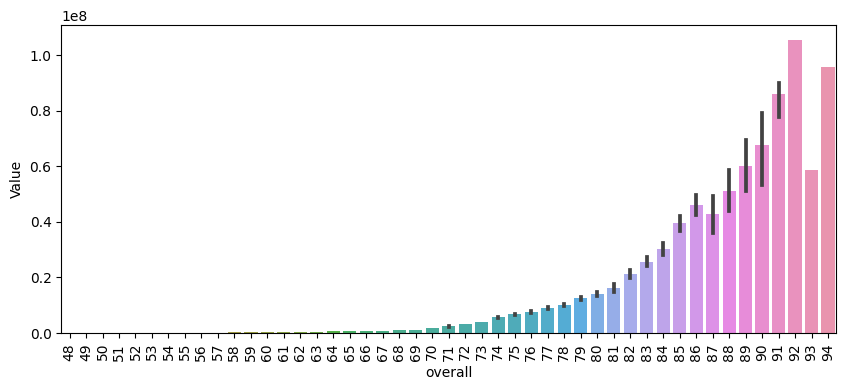

In [524]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['overall'], y=df['value_eur'])
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

value increases with overall rating

### Overall Rating vs Potential

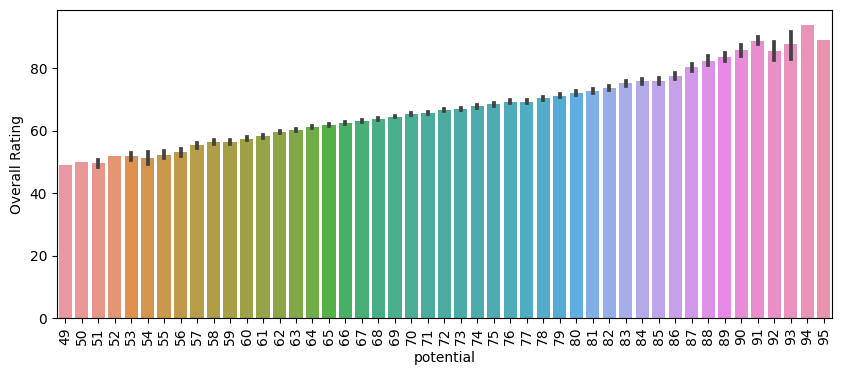

In [529]:
plt.figure(figsize=(10,4))
sns.barplot(y=df['overall'], x=df['potential'])
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)
plt.show()

rating is linearly dependent on potential

### Value

Value of top players

In [530]:
top_players=df.sort_values(by=['overall'], ascending=False).head(10)

<AxesSubplot: xlabel='short_name', ylabel='value_eur'>

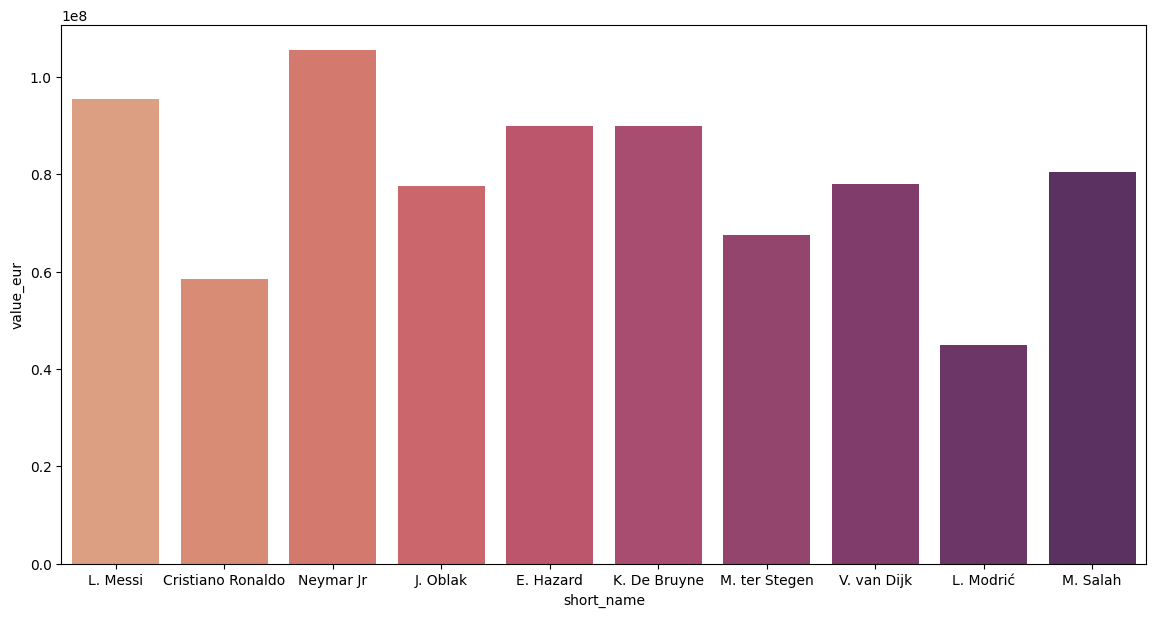

In [534]:
plt.figure(figsize=(14, 7))
sns.barplot(x=top_players['short_name'], y=top_players['value_eur'], palette='flare' )

most valuable player with highest rate is Neymar

### Potential

Player with heighest potential

In [535]:
df.loc[df['potential']==df['potential'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,...,62,62,62,66,63,54,54,54,63,23.04002


Mbappe has the heighest potential of 95!

In [536]:
df.sort_values(by=['potential'], ascending=False).head(15)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,...,62,62,62,66,63,54,54,54,63,23.040020
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66,66,66,68,63,52,52,52,63,24.913495
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,...,0,0,0,0,0,0,0,0,0,24.307244
73,M. de Ligt,19,189,89,Netherlands,Juventus,85,93,50000000,76000,...,79,79,79,74,76,82,82,82,76,24.915316
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61,61,61,65,61,53,53,53,61,23.735308
411,João Félix,19,181,70,Portugal,Atlético Madrid,80,93,28000000,38000,...,59,59,59,62,59,53,53,53,59,21.366869
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,0,0,0,0,0,0,0,0,0,24.615211
74,G. Donnarumma,20,196,90,Italy,Milan,85,92,41500000,34000,...,0,0,0,0,0,0,0,0,0,23.427738
108,J. Sancho,19,180,76,England,Borussia Dortmund,84,92,44500000,61000,...,58,58,58,64,59,47,47,47,59,23.456790
109,K. Havertz,20,188,83,Germany,Bayer 04 Leverkusen,84,92,46000000,70000,...,63,63,63,65,62,54,54,54,62,23.483477


### Player Positions

most common player positions are:

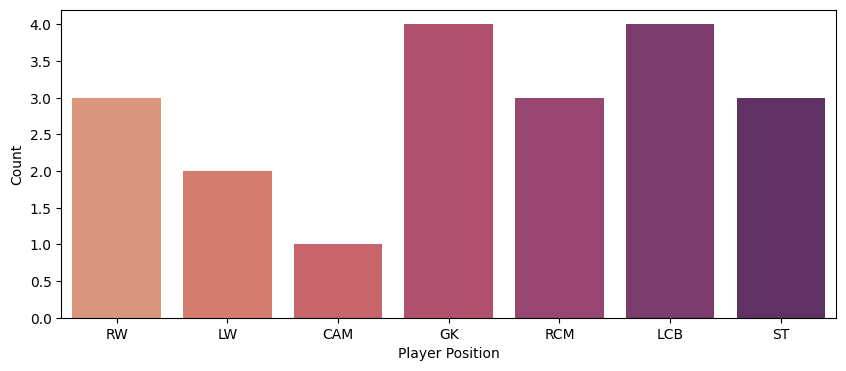

In [542]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['team_position'].head(20), palette='flare')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.show()

### Preferred Foot

<AxesSubplot: ylabel='preferred_foot'>

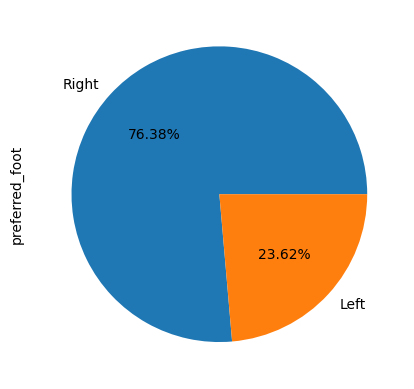

In [545]:
df['preferred_foot'].value_counts().plot.pie(autopct='%.2f%%')

most players prefer right foot

### International Reputation

In [546]:
df['international_reputation'].value_counts()

1    16794
2     1140
3      292
4       46
5        6
Name: international_reputation, dtype: int64

In [547]:
df.loc[df['international_reputation']==5]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66,66,66,68,63,52,52,52,63,24.913495
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61,61,61,65,61,53,53,53,61,23.735308
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,61,61,61,66,61,46,46,46,61,22.204082
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,...,67,67,67,67,64,63,63,63,64,25.963048
31,M. Neuer,33,193,92,Germany,FC Bayern München,88,88,32000000,155000,...,0,0,0,0,0,0,0,0,0,24.698650
96,Z. Ibrahimović,37,195,95,Sweden,LA Galaxy,85,85,14000000,15000,...,57,57,57,53,50,52,52,52,50,24.983563


### Skill Moves

<AxesSubplot: xlabel='skill_moves', ylabel='count'>

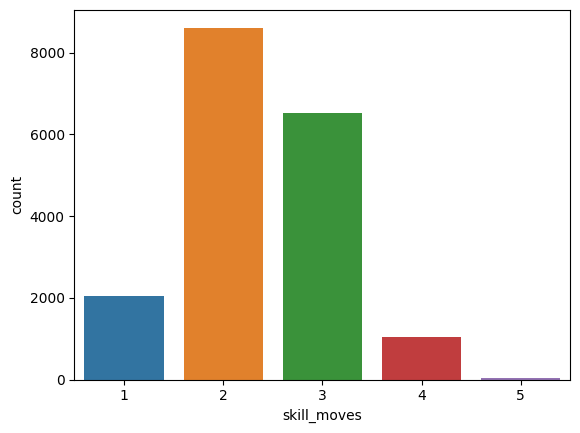

In [548]:
sns.countplot(x = df['skill_moves'])

In [550]:
df.loc[df['skill_moves']==5].head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61,61,61,65,61,53,53,53,61,23.735308
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,61,61,61,66,61,46,46,46,61,22.204082
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,...,62,62,62,66,63,54,54,54,63,23.040020
24,P. Pogba,26,191,84,France,Manchester United,88,91,72500000,250000,...,77,77,77,76,74,72,72,72,74,23.025685
52,Thiago,28,174,70,Spain,FC Bayern München,87,87,50000000,180000,...,78,78,78,78,75,69,69,69,75,23.120624


### Work Rate

<AxesSubplot: xlabel='work_rate', ylabel='count'>

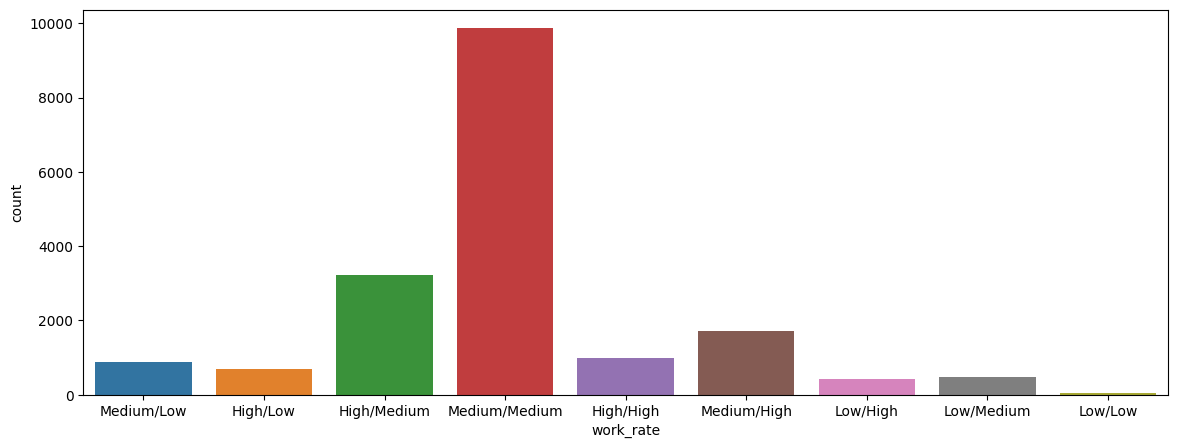

In [552]:
plt.figure(figsize=(14,5))
sns.countplot(x = df['work_rate'])

most players have medium/medium work rate

In [553]:
df.loc[df['work_rate'] == 'High/High'].head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,77,77,77,77,73,66,66,66,73,21.366869
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,...,81,81,81,81,79,72,72,72,79,22.309356
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,...,66,66,66,65,62,60,60,60,62,25.181077
22,A. Griezmann,28,176,73,France,FC Barcelona,89,89,69000000,370000,...,71,71,71,73,70,65,65,65,70,23.566632
27,C. Eriksen,27,181,76,Denmark,Tottenham Hotspur,88,89,68000000,205000,...,71,71,71,71,66,57,57,57,66,23.198315


### Release Clause

<AxesSubplot: xlabel='short_name', ylabel='release_clause_eur'>

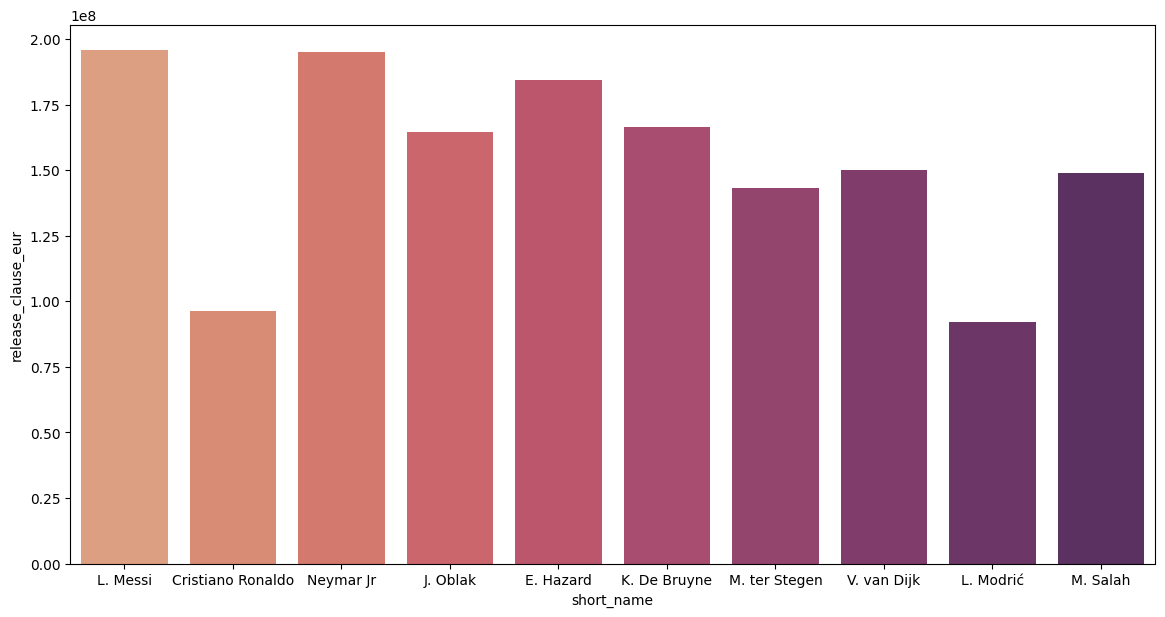

In [555]:
plt.figure(figsize=(14, 7))
sns.barplot(x=top_players['short_name'], y=top_players['release_clause_eur'], palette='flare' )

minimum release clause is:

In [559]:
df.loc[df['release_clause_eur']==df['release_clause_eur'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66,66,66,68,63,52,52,52,63,24.913495


In [562]:
highest_release_clause=df.loc[df['release_clause_eur']==df['release_clause_eur'].max()]['release_clause_eur'][0]
highest_player = df.loc[df['release_clause_eur']==df['release_clause_eur'].max()]['short_name'][0]
print("The player with highest release cause is {} and his release clause is {}".format(heighest_player,heighest_release_clause))

The player with heighest release cause is L. Messi and his release clause is 195800000.0


### Wages

In [563]:
highest_wages = df.sort_values(by=['wage_eur'], ascending=False)
highest_wages.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66,66,66,68,63,52,52,52,63,24.913495
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,63,63,63,66,61,49,49,49,61,24.163265
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61,61,61,65,61,53,53,53,61,23.735308
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,77,77,77,77,73,66,66,66,73,21.366869
22,A. Griezmann,28,176,73,France,FC Barcelona,89,89,69000000,370000,...,71,71,71,73,70,65,65,65,70,23.566632
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,...,67,67,67,67,64,63,63,63,64,25.963048
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,...,81,81,81,81,79,72,72,72,79,22.309356
36,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,...,79,79,79,75,72,69,69,69,72,22.694019
17,S. Agüero,31,173,70,Argentina,Manchester City,89,89,60000000,300000,...,58,58,58,60,56,50,50,50,56,23.388687
21,Sergio Busquets,30,189,76,Spain,FC Barcelona,89,89,55000000,300000,...,86,86,86,78,78,82,82,82,78,21.276000


<AxesSubplot: xlabel='short_name', ylabel='wage_eur'>

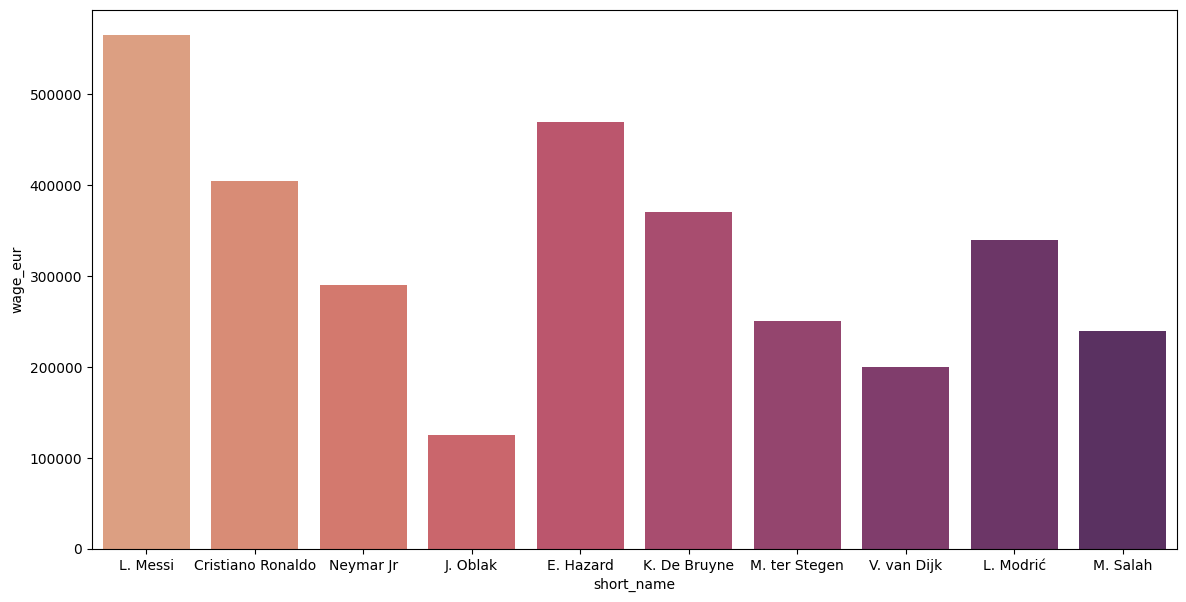

In [566]:
plt.figure(figsize=(14, 7))
sns.barplot(x=top_players['short_name'], y=top_players['wage_eur'], palette='flare' )

### Messi vs Ronaldo

In [573]:
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = df.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,,,
L. Messi,94,94,87,92,92,96,39,66
Cristiano Ronaldo,93,93,90,93,82,89,35,78


we can see that Ronaldo is better in pace, shooting & physic           
while Messi is better in overall rate, potential, passing , dribbling and defending

### Correlation 

In [571]:
df_ = df[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'wage_eur', 'international_reputation',
'skill_moves', 'release_clause_eur', 'value_eur']]

<AxesSubplot: >

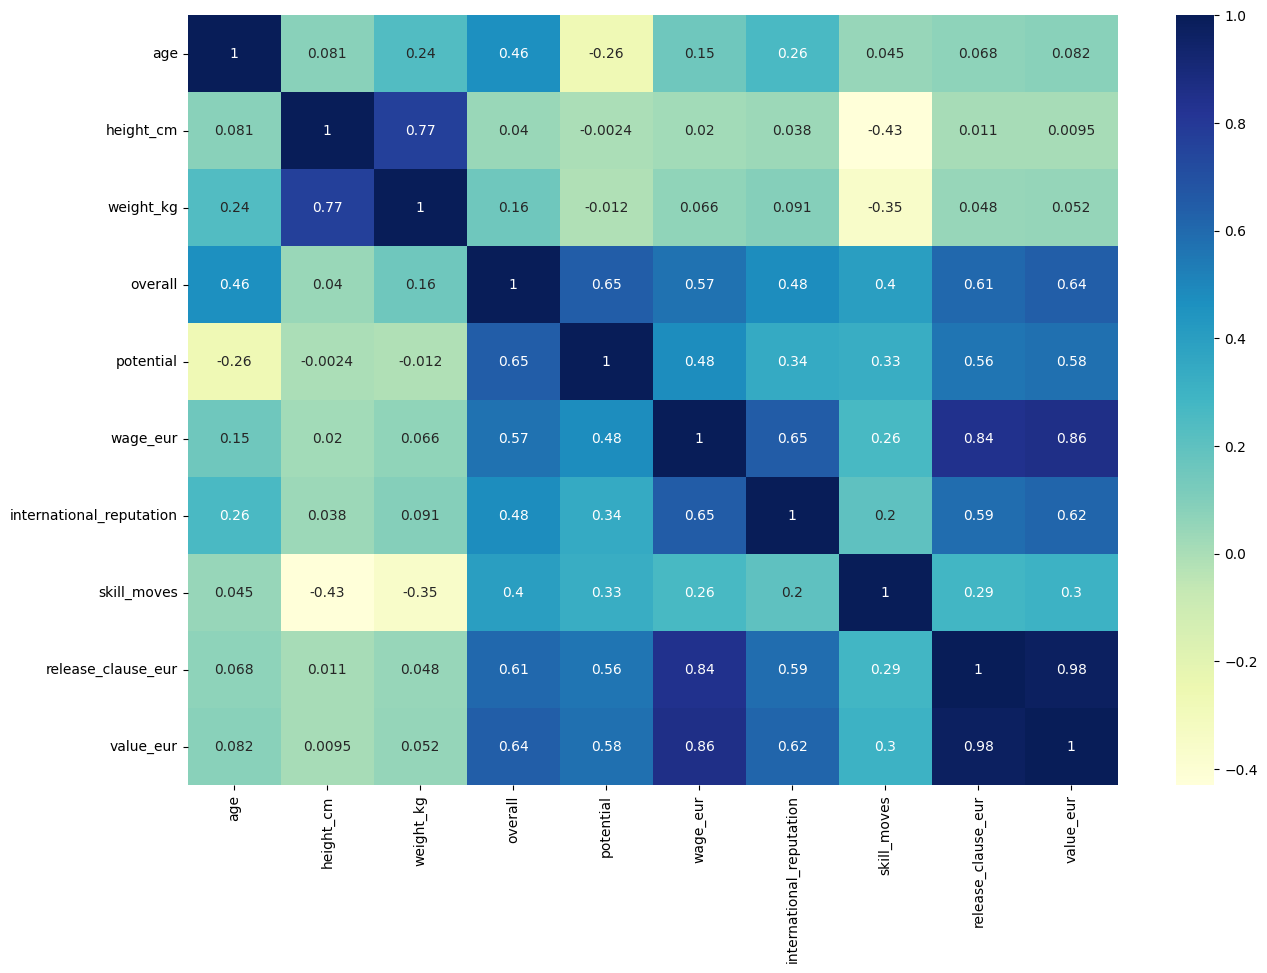

In [572]:
plt.figure(figsize=(15,10))
sns.heatmap(df_.corr(), annot=True, cmap='YlGnBu')

there's high correlation between:             
-overall and release cause            
-overall and potential            
-wage and release cause           
-wage and value            
-release cause and value